In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold

In [17]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Identificar colunas numéricas para tratamento de outliers
numeric_cols_train = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols_test = test_df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Excluir a coluna 'id' e 'labels' (target) da lista de colunas numéricas para tratamento de outliers
if 'id' in numeric_cols_train: numeric_cols_train.remove('id')
if 'labels' in numeric_cols_train: numeric_cols_train.remove('labels')
if 'id' in numeric_cols_test: numeric_cols_test.remove('id')

print("\n--- Outlier Detection (Train DataFrame) ---")
for col in numeric_cols_train:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Coluna {col}: {len(outliers)} outliers detectados ({(len(outliers)/len(train_df))*100:.2f}%)")
        # Capping outliers
        train_df[col] = train_df[col].clip(lower=lower_bound, upper=upper_bound)

print("\n--- Outlier Detection (Test DataFrame) ---")
for col in numeric_cols_test:
    Q1 = test_df[col].quantile(0.25)
    Q3 = test_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Coluna {col}: {len(outliers)} outliers detectados ({(len(outliers)/len(test_df))*100:.2f}%)")
        # Capping outliers
        test_df[col] = test_df[col].clip(lower=lower_bound, upper=upper_bound)

# Save dataframes after outlier treatment
train_df.to_csv('train_cleaned.csv', index=False)
test_df.to_csv('test_cleaned.csv', index=False)


--- Outlier Detection (Train DataFrame) ---
Coluna age_first_funding_year: 14 outliers detectados (2.17%)
Coluna age_last_funding_year: 8 outliers detectados (1.24%)
Coluna age_first_milestone_year: 11 outliers detectados (1.70%)
Coluna age_last_milestone_year: 6 outliers detectados (0.93%)
Coluna relationships: 47 outliers detectados (7.28%)
Coluna funding_rounds: 10 outliers detectados (1.55%)
Coluna funding_total_usd: 50 outliers detectados (7.74%)
Coluna is_NY: 71 outliers detectados (10.99%)
Coluna is_MA: 61 outliers detectados (9.44%)
Coluna is_TX: 24 outliers detectados (3.72%)
Coluna is_otherstate: 136 outliers detectados (21.05%)
Coluna is_software: 105 outliers detectados (16.25%)
Coluna is_web: 97 outliers detectados (15.02%)
Coluna is_mobile: 65 outliers detectados (10.06%)
Coluna is_enterprise: 53 outliers detectados (8.20%)
Coluna is_advertising: 45 outliers detectados (6.97%)
Coluna is_gamesvideo: 37 outliers detectados (5.73%)
Coluna is_ecommerce: 20 outliers detectado

In [18]:
display(train_df.isnull().sum())

id                            0
age_first_funding_year       35
age_last_funding_year         9
age_first_milestone_year    138
age_last_milestone_year     111
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_part

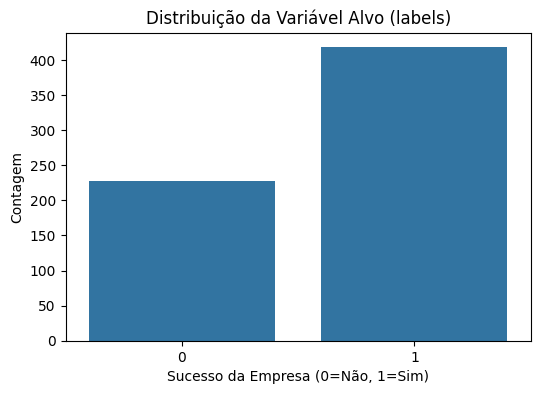

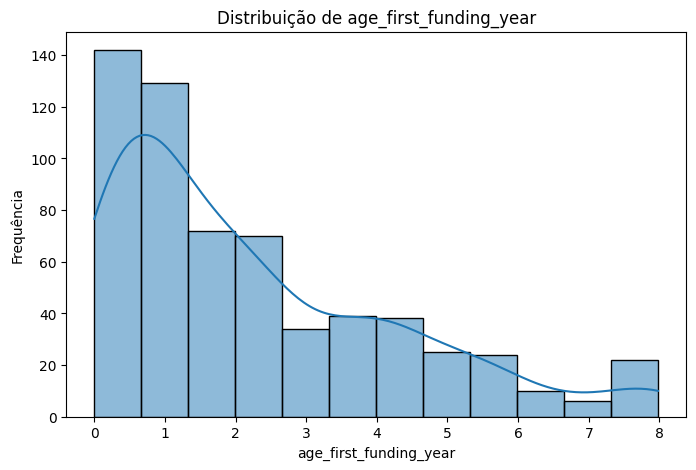

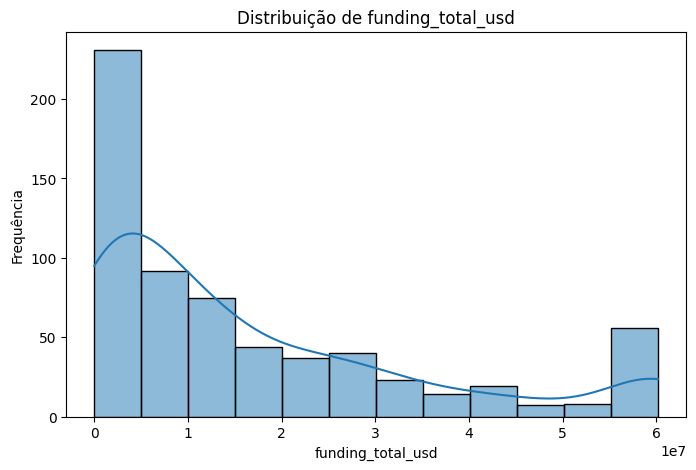

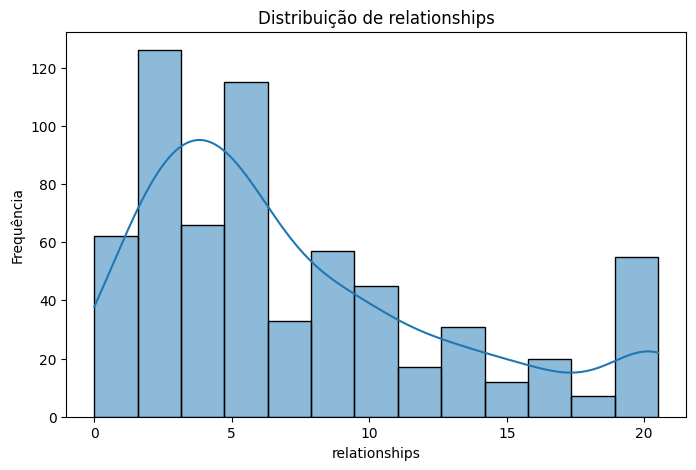

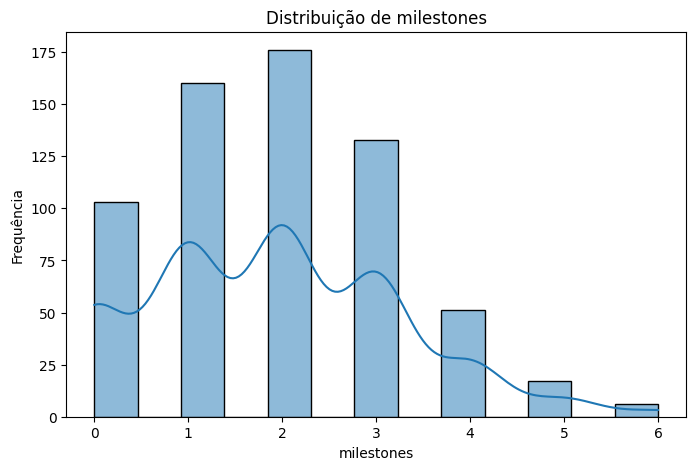

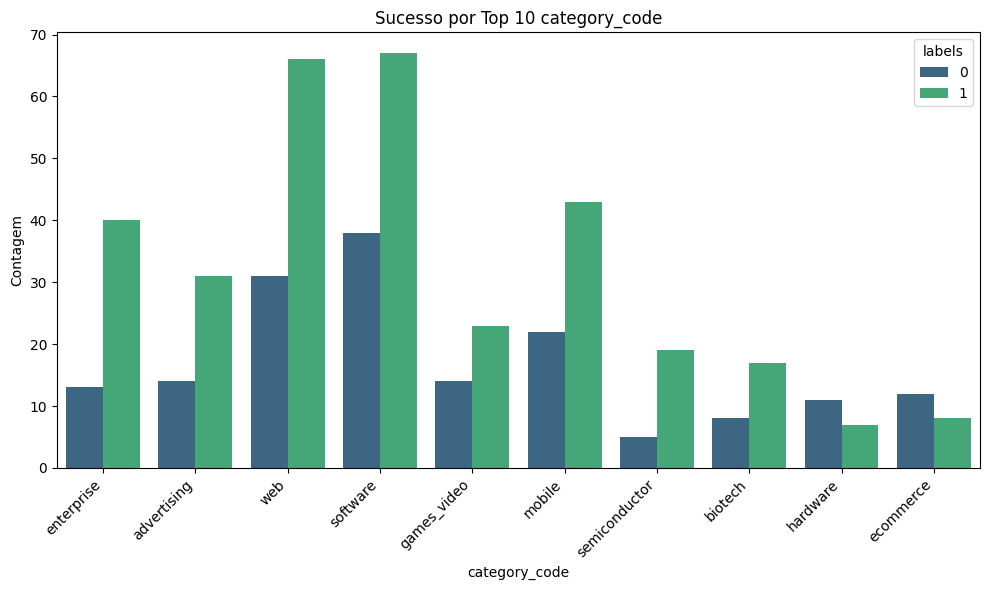

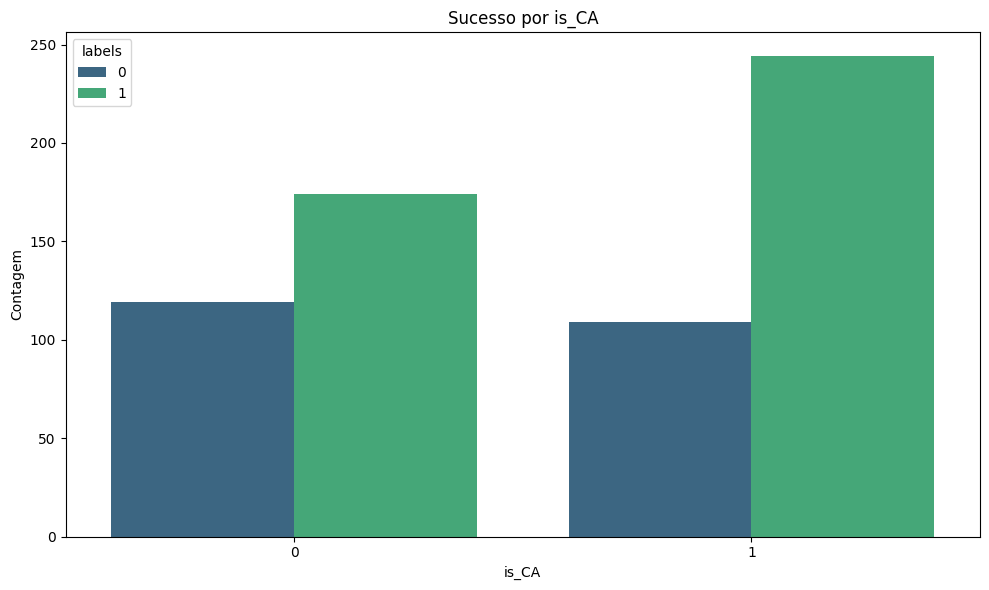

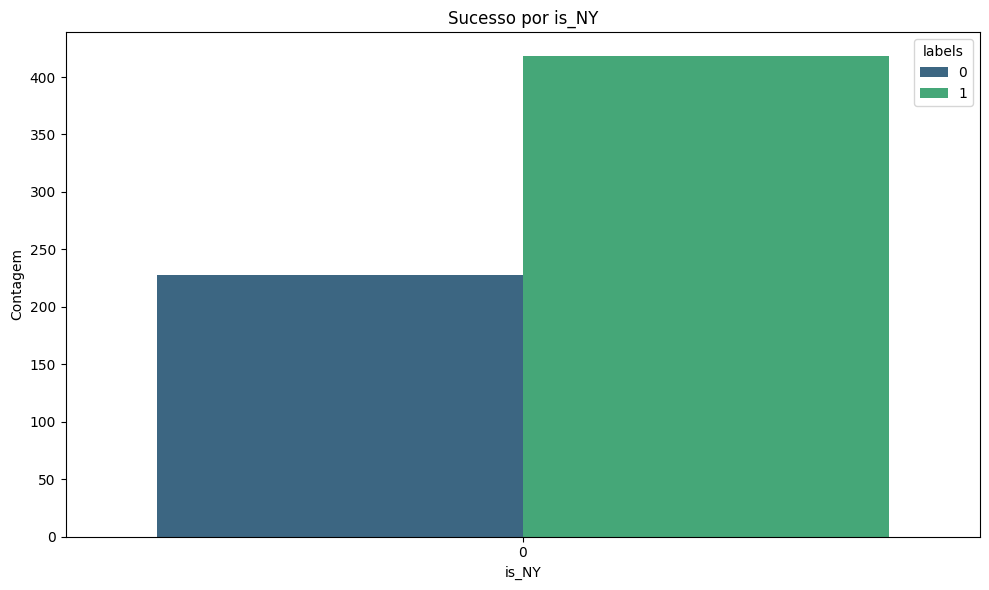

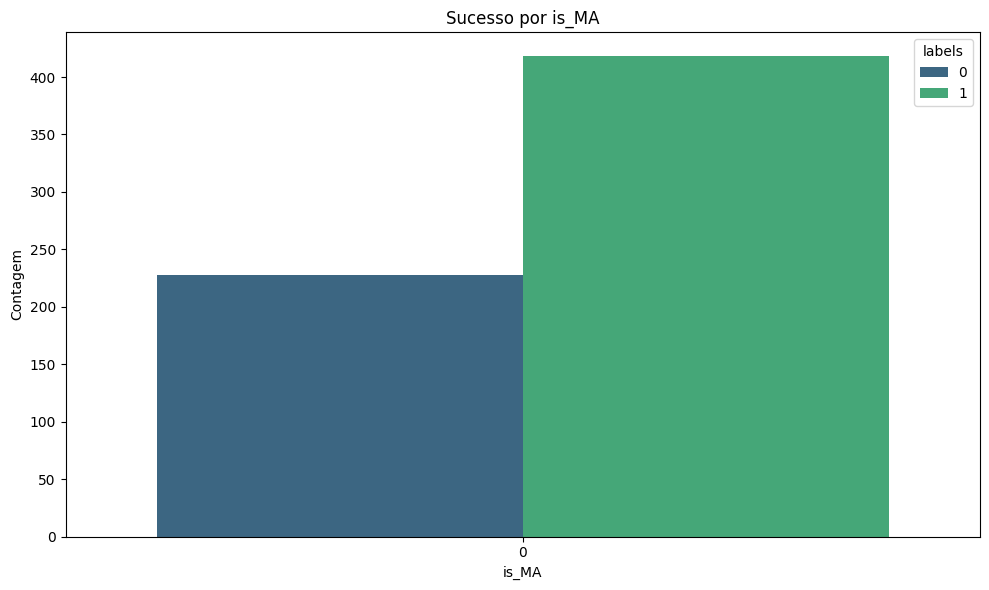

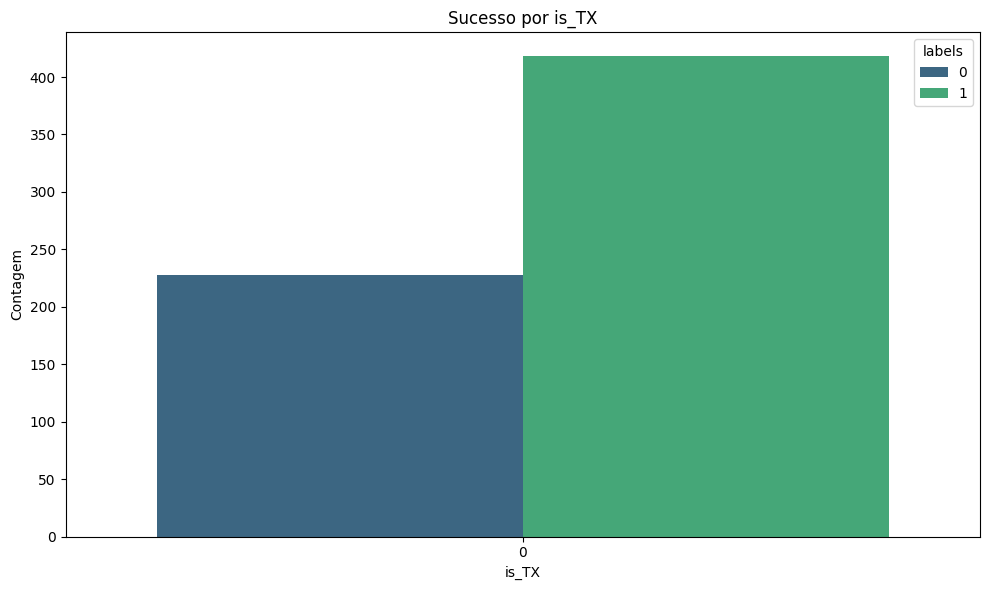

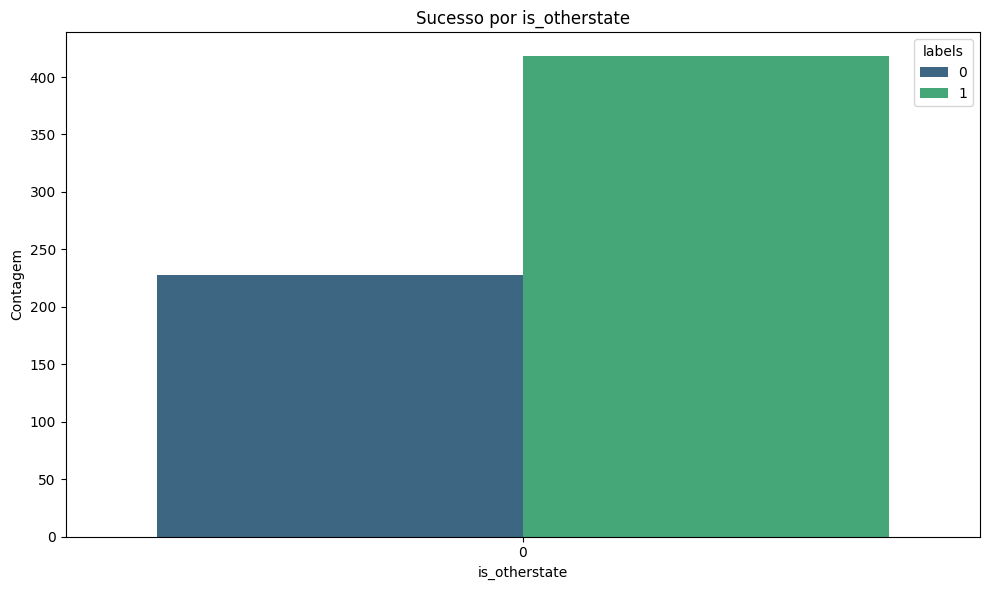

Análise exploratória de dados e visualizações concluídas. Imagens salvas.


In [19]:
train_df = pd.read_csv("train_cleaned.csv")

# 1. Distribuição da variável alvo (labels)
plt.figure(figsize=(6, 4))
sns.countplot(x="labels", data=train_df)
plt.title("Distribuição da Variável Alvo (labels)")
plt.xlabel("Sucesso da Empresa (0=Não, 1=Sim)")
plt.ylabel("Contagem")
plt.show()
plt.close()

# 2. Distribuição de algumas features numéricas importantes
numeric_features = ["age_first_funding_year", "funding_total_usd", "relationships", "milestones"]

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[feature], kde=True)
    plt.title(f"Distribuição de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequência")
    plt.show()
    plt.close()

# 4. Análise de features categóricas vs. target
categorical_features = ["category_code", "is_CA", "is_NY", "is_MA", "is_TX", "is_otherstate"]

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    if feature == "category_code":
        # Para category_code, vamos pegar as top 10 categorias
        top_categories = train_df["category_code"].value_counts().nlargest(10).index
        sns.countplot(x=feature, hue="labels", data=train_df[train_df["category_code"].isin(top_categories)], palette="viridis")
        plt.title(f"Sucesso por Top 10 {feature}")
        plt.xticks(rotation=45, ha="right")
    else:
        sns.countplot(x=feature, hue="labels", data=train_df, palette="viridis")
        plt.title(f"Sucesso por {feature}")
    plt.xlabel(feature)
    plt.ylabel("Contagem")
    plt.tight_layout()
    plt.show()

print("Análise exploratória de dados e visualizações concluídas. Imagens salvas.")

In [20]:
train_df = pd.read_csv("train_cleaned.csv")
test_df = pd.read_csv("test_cleaned.csv")

# Codificação de variáveis categóricas (One-Hot Encoding para 'category_code')
train_df = pd.get_dummies(train_df, columns=["category_code"], prefix="category")
test_df = pd.get_dummies(test_df, columns=["category_code"], prefix="category")

# Alinhar colunas - importante para garantir que ambos os dataframes (treino e teste) tenham as mesmas colunas
# Isso é crucial se uma categoria aparece em um dataset e não no outro
train_labels = train_df["labels"]
train_ids = train_df["id"]
test_ids = test_df["id"]

# Remover 'id' e 'labels' antes de alinhar as colunas
train_df = train_df.drop(columns=["id", "labels"])
test_df = test_df.drop(columns=["id"])

common_cols = list(set(train_df.columns) & set(test_df.columns))
train_df = train_df[common_cols]
test_df = test_df[common_cols]

# Adicionar de volta as colunas que podem ter sido perdidas no alinhamento, preenchendo com 0
missing_in_test = set(train_df.columns) - set(test_df.columns)
for col in missing_in_test:
    test_df[col] = 0

missing_in_train = set(test_df.columns) - set(train_df.columns)
for col in missing_in_train:
    train_df[col] = 0

# Garantir que a ordem das colunas seja a mesma
test_df = test_df[train_df.columns]

# Seleção de Features
# Com base na EDA e nas hipóteses, vamos incluir todas as features numéricas e as categóricas codificadas.
# As colunas 'id' e 'labels' já foram tratadas.

X_train = train_df
y_train = train_labels
X_test = test_df

print("Shape de X_train após codificação e seleção de features:", X_train.shape)
print("Shape de X_test após codificação e seleção de features:", X_test.shape)

# Salvar os dataframes processados
X_train.to_csv("X_train_processed.csv", index=False)
y_train.to_csv("y_train_processed.csv", index=False)
X_test.to_csv("X_test_processed.csv", index=False)

Shape de X_train após codificação e seleção de features: (646, 62)
Shape de X_test após codificação e seleção de features: (277, 62)


In [21]:
X_train = pd.read_csv("X_train_processed.csv")
y_train = pd.read_csv("y_train_processed.csv")

# Inicializar o modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Configurar a validação cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("--- Avaliação do Modelo Inicial com Validação Cruzada ---")
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred_fold = model.predict(X_val_fold)

    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
    precision_scores.append(precision_score(y_val_fold, y_pred_fold))
    recall_scores.append(recall_score(y_val_fold, y_pred_fold))
    f1_scores.append(f1_score(y_val_fold, y_pred_fold))

    print(f"Fold {fold+1}:")
    print(f"  Acurácia: {accuracy_scores[-1]:.4f}")
    print(f"  Precisão: {precision_scores[-1]:.4f}")
    print(f"  Recall: {recall_scores[-1]:.4f}")
    print(f"  F1-Score: {f1_scores[-1]:.4f}")

print("\n--- Métricas Médias da Validação Cruzada ---")
print(f"Acurácia Média: {pd.Series(accuracy_scores).mean():.4f}")
print(f"Precisão Média: {pd.Series(precision_scores).mean():.4f}")
print(f"Recall Médio: {pd.Series(recall_scores).mean():.4f}")
print(f"F1-Score Médio: {pd.Series(f1_scores).mean():.4f}")

# Salvar as métricas para documentação futura
with open("initial_model_metrics.txt", "w") as f:
    f.write("--- Avaliação do Modelo Inicial com Validação Cruzada ---\n")
    for fold, acc, prec, rec, f1 in zip(range(1, skf.get_n_splits()+1), accuracy_scores, precision_scores, recall_scores, f1_scores):
        f.write(f"Fold {fold}:\n")
        f.write(f"  Acurácia: {acc:.4f}\n")
        f.write(f"  Precisão: {prec:.4f}\n")
        f.write(f"  Recall: {rec:.4f}\n")
        f.write(f"  F1-Score: {f1:.4f}\n")
    f.write("\n--- Métricas Médias da Validação Cruzada ---\n")
    f.write(f"Acurácia Média: {pd.Series(accuracy_scores).mean():.4f}\n")
    f.write(f"Precisão Média: {pd.Series(precision_scores).mean():.4f}\n")
    f.write(f"Recall Médio: {pd.Series(recall_scores).mean():.4f}\n")
    f.write(f"F1-Score Médio: {pd.Series(f1_scores).mean():.4f}\n")

--- Avaliação do Modelo Inicial com Validação Cruzada ---
Fold 1:
  Acurácia: 0.8308
  Precisão: 0.8100
  Recall: 0.9643
  F1-Score: 0.8804
Fold 2:
  Acurácia: 0.7364
  Precisão: 0.7634
  Recall: 0.8554
  F1-Score: 0.8068
Fold 1:
  Acurácia: 0.8308
  Precisão: 0.8100
  Recall: 0.9643
  F1-Score: 0.8804
Fold 2:
  Acurácia: 0.7364
  Precisão: 0.7634
  Recall: 0.8554
  F1-Score: 0.8068
Fold 3:
  Acurácia: 0.7829
  Precisão: 0.8022
  Recall: 0.8795
  F1-Score: 0.8391
Fold 3:
  Acurácia: 0.7829
  Precisão: 0.8022
  Recall: 0.8795
  F1-Score: 0.8391
Fold 4:
  Acurácia: 0.7752
  Precisão: 0.7619
  Recall: 0.9524
  F1-Score: 0.8466
Fold 5:
  Acurácia: 0.8062
  Precisão: 0.8105
  Recall: 0.9167
  F1-Score: 0.8603

--- Métricas Médias da Validação Cruzada ---
Acurácia Média: 0.7863
Precisão Média: 0.7896
Recall Médio: 0.9137
F1-Score Médio: 0.8466
Fold 4:
  Acurácia: 0.7752
  Precisão: 0.7619
  Recall: 0.9524
  F1-Score: 0.8466
Fold 5:
  Acurácia: 0.8062
  Precisão: 0.8105
  Recall: 0.9167
  F1-

# Random Forest com GridSearchCV


In [22]:
X_train = pd.read_csv("X_train_processed.csv")
y_train = pd.read_csv("y_train_processed.csv")
X_test_final = pd.read_csv("X_test_processed.csv")

# Inicializar o modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Definir a grade de hiperparâmetros para busca
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [10, 20, None],      # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]     # Número mínimo de amostras em um nó folha
}

# Configurar StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV com validação cruzada estratificada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2, scoring='accuracy')

# Executar a busca pelos melhores hiperparâmetros no conjunto de treino completo
grid_search.fit(X_train, y_train.values.ravel())

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

# Obter o melhor modelo
best_model = grid_search.best_estimator_

# Treinar o modelo final com os melhores hiperparâmetros em todo o conjunto de treino
final_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
final_model.fit(X_train, y_train.values.ravel())

# Fazer previsões no conjunto de teste real
test_predictions = final_model.predict(X_test_final)

# Gerar o arquivo de submissão
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission["labels"] = test_predictions
sample_submission.to_csv("submission.csv", index=False)

print("Arquivo de submissão gerado: submission.csv")

# Salvar as métricas do modelo otimizado (usando os resultados do GridSearchCV)
with open("optimized_model_metrics.txt", "w") as f:
    f.write("Melhores hiperparâmetros: " + str(grid_search.best_params_) + "\n")
    f.write(f"Melhor Acurácia Média da Validação Cruzada: {grid_search.best_score_:.4f}\n")

print("Métricas do modelo otimizado salvas em optimized_model_metrics.txt")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores hiperparâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Arquivo de submissão gerado: submission.csv
Métricas do modelo otimizado salvas em optimized_model_metrics.txt
Melhores hiperparâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Arquivo de submissão gerado: submission.csv
Métricas do modelo otimizado salvas em optimized_model_metrics.txt


## Gradient Boosting

1. Seleção de features com SelectKBest (reduz ruído das muitas colunas one-hot).
2. Uso de GradientBoostingClassifier (melhor bias/variance em dados tabulares pequenos).
3. Validação cruzada estratificada com mais folds (10) para estimativa estável.
4. Fixação de seeds para reprodutibilidade.
5. Treino final com todas as amostras e geração de uma nova submissão (`submission_gb.csv`).


In [23]:
# Fixar seeds e checagens básicas
import os, random, numpy as np
random.seed(42)
os.environ["PYTHONHASHSEED"] = "42"
np.random.seed(42)

import pandas as pd

# Garantir que X_train, y_train já existam (caso notebook seja executado parcialmente)
if 'X_train' not in globals() or 'y_train' not in globals():
    X_train = pd.read_csv('X_train_processed.csv')
    y_train = pd.read_csv('y_train_processed.csv')

print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)

# Verificar se target é binário/inteiro
print("Valores únicos target:", y_train.iloc[:,0].unique())

Shape X_train: (646, 62)
Shape y_train: (646, 1)
Valores únicos target: [0 1]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Converter y_train para vetor 1D
if len(y_train.shape) > 1:
    y_vec = y_train.iloc[:,0].values
else:
    y_vec = y_train.values

# Imputação robusta (garantia extra caso células anteriores não tenham sido executadas)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)  # numpy array

# Verificação preventiva
total_nans = np.isnan(X_train_imputed).sum()
if total_nans > 0:
    raise ValueError(f"Ainda existem {total_nans} NaNs. Verifique dados.")

k = min(20, X_train_imputed.shape[1])
selector = SelectKBest(score_func=f_classif, k=k)
X_train_sel = selector.fit_transform(X_train_imputed, y_vec)
selected_mask = selector.get_support()
selected_cols = X_train.columns[selected_mask].tolist()
print(f"Features selecionadas ({len(selected_cols)}): {selected_cols}")

gb = GradientBoostingClassifier(
    random_state=42,
    n_estimators=150,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=8
)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb, X_train_sel, y_vec, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Acurácia CV 10-fold (GB): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Salvar métricas
with open('optimized_model_metrics.txt', 'a', encoding='utf-8') as f:
    f.write(f"GradientBoosting_SelectKBest k={k} | Acc_mean={cv_scores.mean():.4f} | Acc_std={cv_scores.std():.4f}\n")

# Guardar objetos para uso posterior
pipeline_artifacts = {
    'imputer': imputer,
    'selector': selector,
    'selected_cols': selected_cols
}
print("Objetos (imputer, selector, selected_cols) armazenados em pipeline_artifacts.")

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 1  9 12 14 17 20 23 27 29 31 36 41 47 48 56] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Features selecionadas (20): ['is_CA', 'has_angel', 'category_hardware', 'avg_participants', 'category_enterprise', 'funding_total_usd', 'has_roundA', 'relationships', 'age_first_milestone_year', 'category_public_relations', 'milestones', 'has_roundB', 'funding_rounds', 'category_music', 'category_semiconductor', 'age_last_milestone_year', 'age_last_funding_year', 'category_cleantech', 'category_ecommerce', 'category_other']
Acurácia CV 10-fold (GB): 0.7833 ± 0.0343
Objetos (imputer, selector, selected_cols) armazenados em pipeline_artifacts.
Acurácia CV 10-fold (GB): 0.7833 ± 0.0343
Objetos (imputer, selector, selected_cols) armazenados em pipeline_artifacts.


In [27]:
# Diagnóstico de NaNs antes da seleção de features
import pandas as pd
nan_counts = X_train.isna().sum()
cols_with_nan = nan_counts[nan_counts > 0].sort_values(ascending=False)
if cols_with_nan.empty:
    print("Nenhuma coluna com NaN em X_train.")
else:
    print("Colunas com NaN e suas contagens:")
    print(cols_with_nan)
    print(f"Total de colunas com NaN: {len(cols_with_nan)}")
    print("Percentual de NaNs por coluna (%):")
    print((cols_with_nan / len(X_train) * 100).round(2))

Colunas com NaN e suas contagens:
age_first_milestone_year    138
age_last_milestone_year     111
age_first_funding_year       35
age_last_funding_year         9
dtype: int64
Total de colunas com NaN: 4
Percentual de NaNs por coluna (%):
age_first_milestone_year    21.36
age_last_milestone_year     17.18
age_first_funding_year       5.42
age_last_funding_year        1.39
dtype: float64


In [ ]:
import numpy as np

numeric_cols = X_train.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns
# Heurística: colunas dummies normalmente começam com 'category_' ou prefixos binários (0/1)

# Medianas para numéricas
medianas = X_train[numeric_cols].median()
X_train[numeric_cols] = X_train[numeric_cols].fillna(medianas)

X_train = X_train.fillna(0)

# Validar
resto = X_train.isna().sum().sum()
print(f"Total de NaNs após imputação: {resto}")
if resto == 0:
    print("Imputação concluída com sucesso.")
else:
    print("Ainda restam NaNs – verificar manualmente.")

Total de NaNs após imputação: 0
Imputação concluída com sucesso.


In [29]:
# Treino final em todas as amostras selecionadas e geração de submissão
# Reutiliza gb, pipeline_artifacts (imputer, selector, selected_cols) já definidos
import numpy as np
import pandas as pd

if 'pipeline_artifacts' not in globals():
    raise RuntimeError("pipeline_artifacts não encontrado. Execute a célula de seleção de features antes desta.")

imputer = pipeline_artifacts['imputer']
selector = pipeline_artifacts['selector']
selected_cols = pipeline_artifacts['selected_cols']

# Recarregar X_test_final se ainda não estiver disponível
if 'X_test_final' not in globals():
    if 'X_test' in globals():
        X_test_final = X_test.copy()
    else:
        X_test_final = pd.read_csv('X_test_processed.csv')

# Alinhar colunas de teste com treinamento
X_test_aligned = X_test_final.reindex(columns=X_train.columns, fill_value=0)

# Aplicar imputação ao teste
X_test_imputed = imputer.transform(X_test_aligned)

# Transformação de seleção
X_test_sel = selector.transform(X_test_imputed)

# Reajustar modelo no dataset completo (usando X_train_sel já calculado)
gb.fit(X_train_sel, y_vec)

# Predições finais
final_preds = gb.predict(X_test_sel)

# Gerar submission
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['labels'] = final_preds
sample_submission.to_csv('submission_gb.csv', index=False)
print('Arquivo submission_gb.csv salvo.')

# Importância aproximada de features via feature_importances_ do GB
if hasattr(gb, 'feature_importances_'):
    importances = gb.feature_importances_
    order = np.argsort(importances)[::-1]
    print('\nTop 10 importâncias:')
    for i in order[:10]:
        print(f"{selected_cols[i]}: {importances[i]:.4f}")

Arquivo submission_gb.csv salvo.

Top 10 importâncias:
relationships: 0.3030
funding_total_usd: 0.1851
age_last_milestone_year: 0.1416
age_last_funding_year: 0.0907
age_first_milestone_year: 0.0658
avg_participants: 0.0630
milestones: 0.0534
funding_rounds: 0.0248
category_other: 0.0205
category_public_relations: 0.0130
